In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df = pd.read_csv("./data/weather_with_avg_hourly_flight_delay.csv")
delay = df.copy()
delay.head()

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyStationPressure,HourlyPressureChange,HourlyPressureTendency,HourlyVisibility,HourlyWindSpeed,...,HourlyRelativeHumidity,REPORT_TYPE,cloud_1,cloud_0,wind_north,wind_east,wind_south,wind_west,join_time,avg_delay
0,2017-12-01T00:53:00,30.14,40.0,45.0,30.16,29.67,-0.00,3.0,10.0,13.0,...,83.0,FM-15,0,1,0,0,1,0,2017120100,-6.600000
1,2017-12-01T01:53:00,30.13,39.0,44.0,30.16,29.66,0.00,0.0,10.0,10.0,...,83.0,FM-15,0,1,0,0,1,0,2017120101,-10.000000
2,2017-12-01T05:53:00,30.08,36.0,42.0,30.10,29.61,0.00,0.0,10.0,10.0,...,79.0,FM-15,0,1,0,0,1,0,2017120105,-3.160000
3,2017-12-01T06:53:00,30.07,35.0,39.0,30.09,29.60,0.04,6.0,10.0,8.0,...,86.0,FM-15,0,1,0,0,1,0,2017120106,1.187500
4,2017-12-01T07:53:00,30.06,36.0,41.0,30.09,29.59,0.00,0.0,10.0,7.0,...,82.0,FM-15,1,0,0,0,1,0,2017120107,4.147541


In [2]:
delay.drop(['HourlySkyConditions', 'REPORT_TYPE', 'join_time','DATE'], axis=1, inplace=True)

In [3]:
train_features, test_features, train_outcome, test_outcome = train_test_split(
    delay.drop("avg_delay", axis=1),      # features
    delay.avg_delay,    # outcome
    test_size=0.30, # percentage of data to use as the test set
    random_state=11
)

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [5]:
score_min = 99999
for order in range(1, 4):
    poly = PolynomialFeatures(degree = order)
    regr = linear_model.LinearRegression()
    new_train = poly.fit_transform(train_features)
    regr.fit(new_train, train_outcome)       
    new_test = poly.fit_transform(test_features)
    result = regr.predict(new_test)
    score = mean_squared_error(result, test_outcome)        
    if score < score_min:
        score_min = score
    print("n={}, MSE = {:<0.5}".format(order, score))

n=1, MSE = 165.95
n=2, MSE = 161.34
n=3, MSE = 3224.6


In [6]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
new_train = poly.fit_transform(train_features)
regr.fit(new_train, train_outcome)
result = regr.predict(new_train)
score = mean_squared_error(result, train_outcome)
print("Mean squared error = ", score)

Mean squared error =  121.66124856921716


In [7]:
new_test = poly.fit_transform(test_features)
result = regr.predict(new_test)
score = mean_squared_error(result, test_outcome)
print("Mean squared error = ", score)

Mean squared error =  161.33856369693044


In [8]:
p2 = regr.predict(poly.fit_transform(delay.drop("avg_delay", axis=1)))
delay['prediction'] = p2

In [9]:
import seaborn as sns

C:\Users\liang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Polynomial model fit')

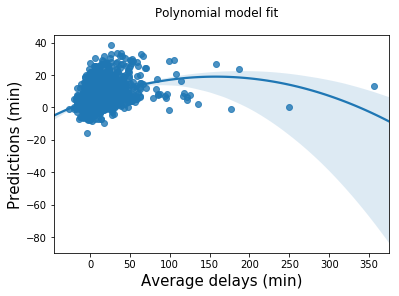

In [10]:
sns.regplot(delay.avg_delay, delay.prediction, data=delay, order=2)
plt.xlabel('Average delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.suptitle("Polynomial model fit")

In [11]:
d_res = delay.avg_delay-delay.prediction
SSresid = sum(pow(d_res, 2))
SStotal = len(delay.avg_delay) * np.var(delay.avg_delay)
r_sqr = 1 - SSresid / SStotal
print(r_sqr)

0.12079602412939194


In [12]:
from sklearn.metrics import mean_absolute_error

In [14]:
mean_absolute_error(delay.prediction, delay.avg_delay)

6.752893841905367

In [15]:
mean_squared_error(delay.prediction, delay.avg_delay)

133.5674611588847